In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
sns.set_style('darkgrid')

In [17]:
df = pd.read_csv('./data/diamonds.csv')

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
df.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [22]:
df.duplicated().sum()

np.int64(146)

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(53794, 10)

In [25]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Categorical Engineering

In [26]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

## Data Cleaning

In [27]:
sample = df.sample(3000, random_state=42)
# getting a smaller sample of the data for plotting purposes

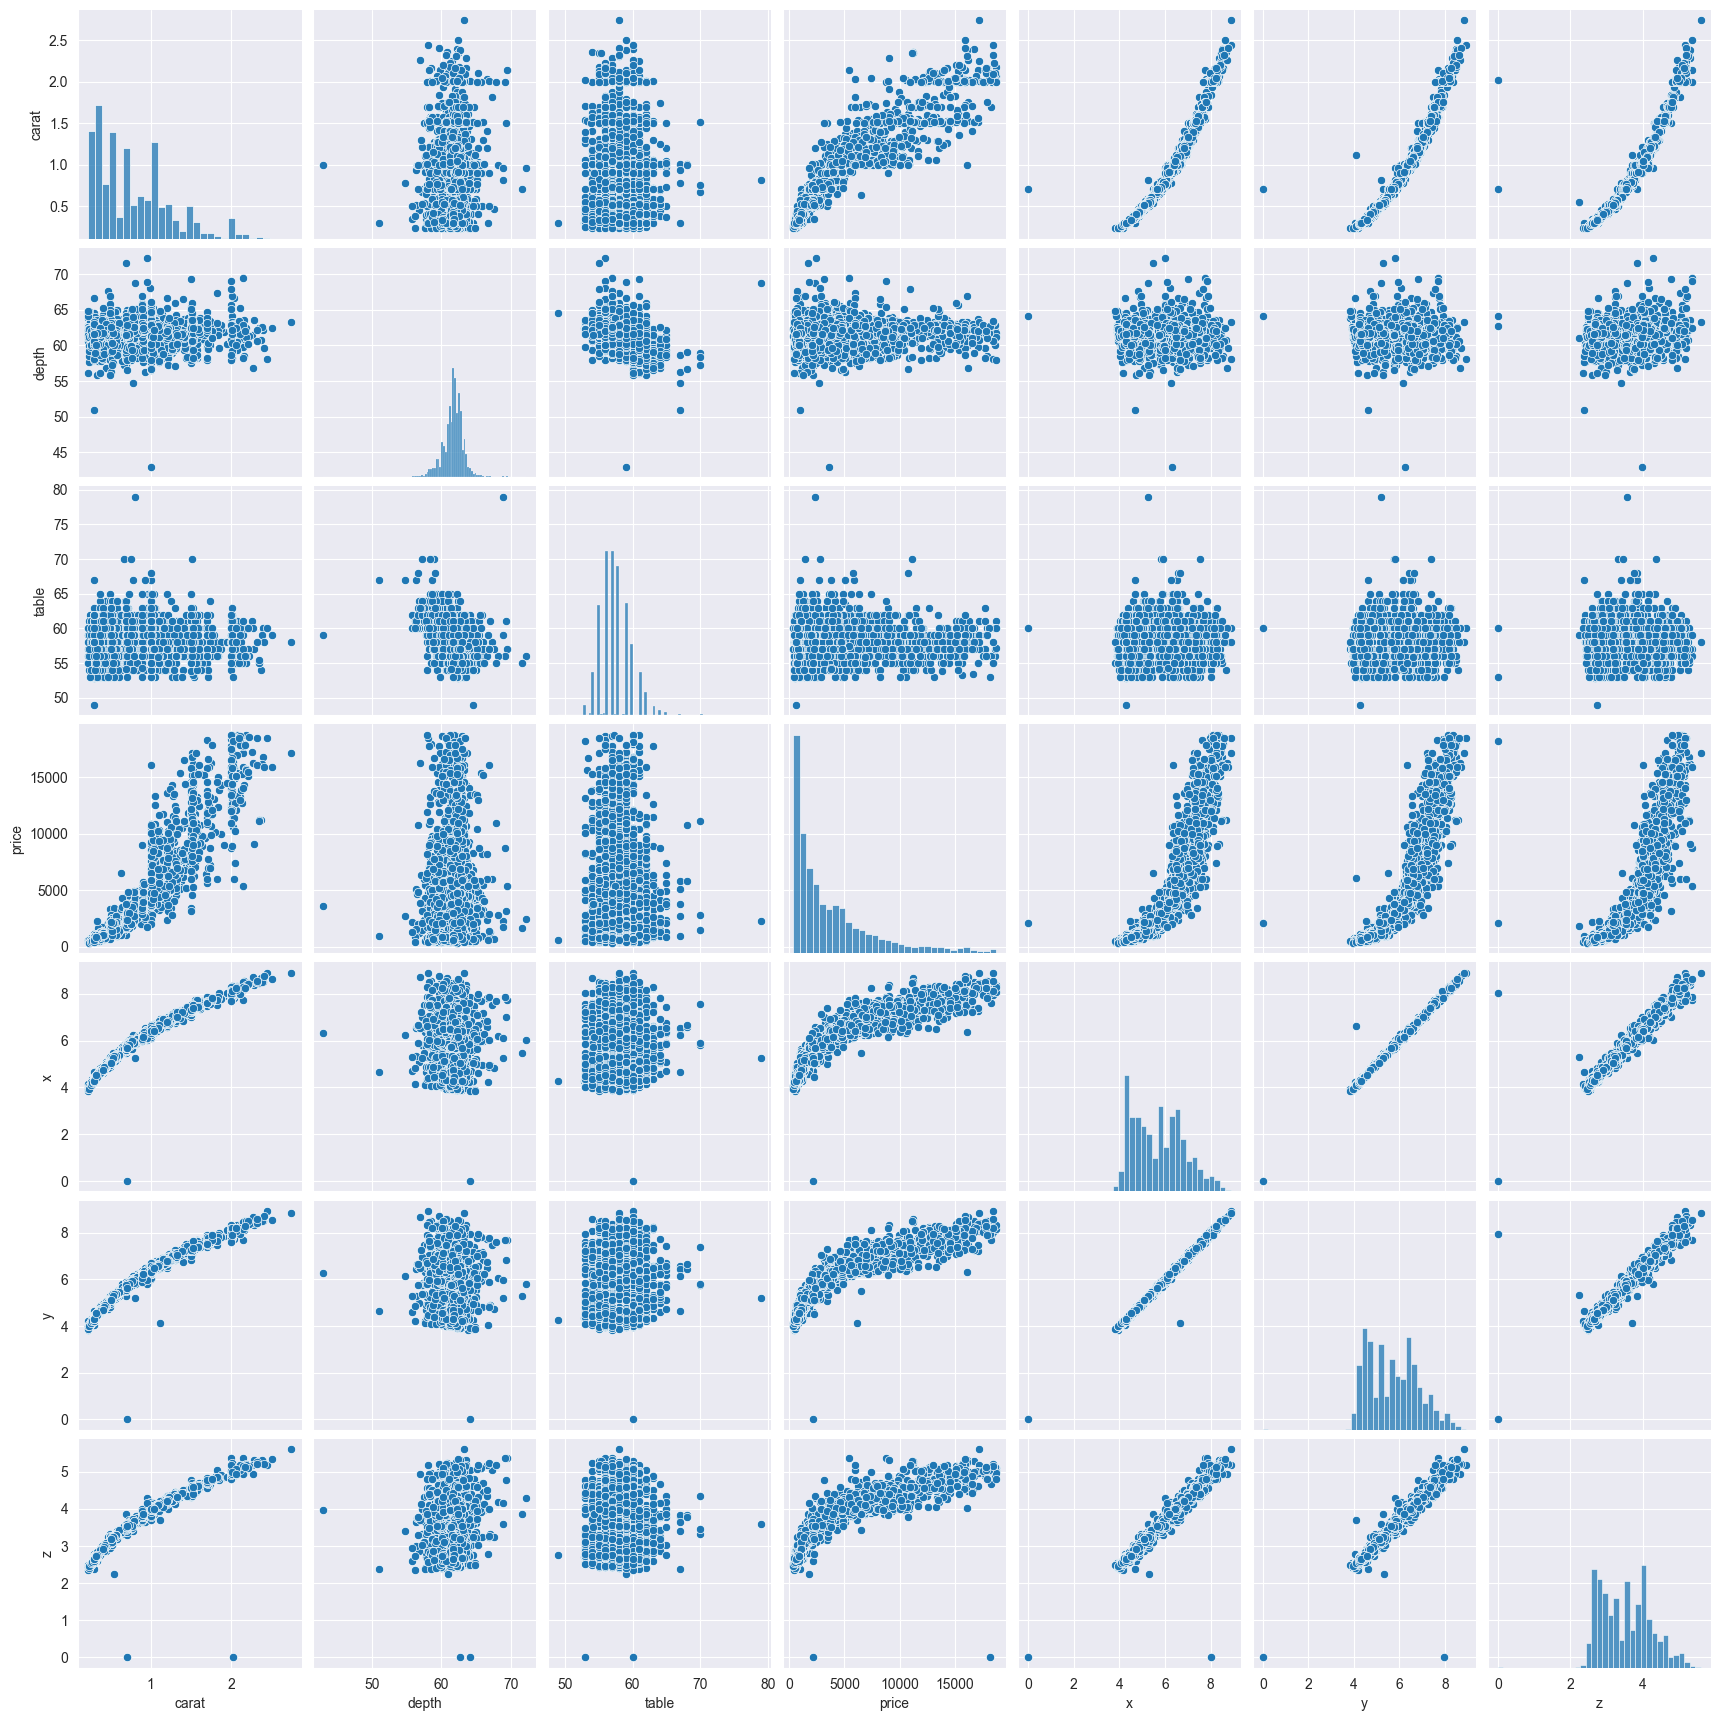

In [28]:
sns.pairplot(data=sample)

> Looks like there are alot of outliers in the `price` column. Let's look at that with and without outliers.

<Axes: xlabel='price'>

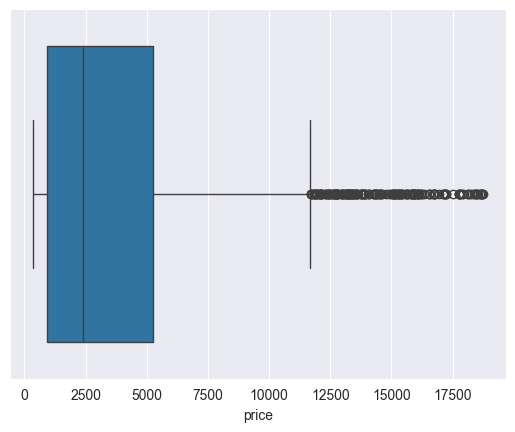

In [29]:
sns.boxplot(data=sample, x='price')

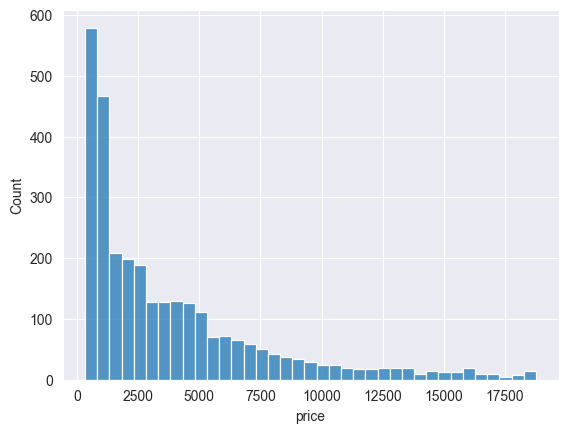

In [30]:
ax = sns.histplot(data=sample, x='price', binwidth=500)

> The above boxplot and histogram show the distribution of the Price column, where we can see there are many outliers. 

In [31]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return column[(column > lower_bound) & (column < upper_bound)]

In [32]:
prices = sample['price']

In [33]:
new_prices = remove_outliers(prices)

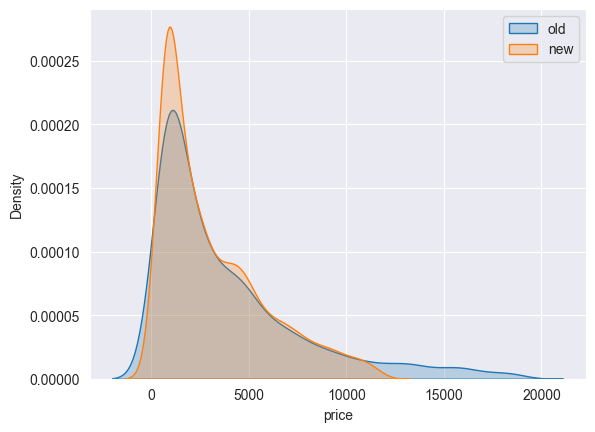

In [34]:
sns.kdeplot(data=prices, label='old', fill=True)
sns.kdeplot(data=new_prices, label='new', fill=True)
plt.legend()

> This shows 2 kde plots. The blue is the original data, while the orange is the same data, but without the outliers.
>
> We can see the orange kde line stops at arouind 1250, so anything above this would be considered abnormal.
>
> However, the prices of the original do not seem to be obscurley high, so we can assume they are valid entries. 

In [70]:
# sns.stripplot(x=prices, alpha=0.5, color='blue')
# sns.stripplot(x=new_prices, alpha=0.3, color='red')

In [36]:
carat = sample['carat']
carat_out = remove_outliers(carat)

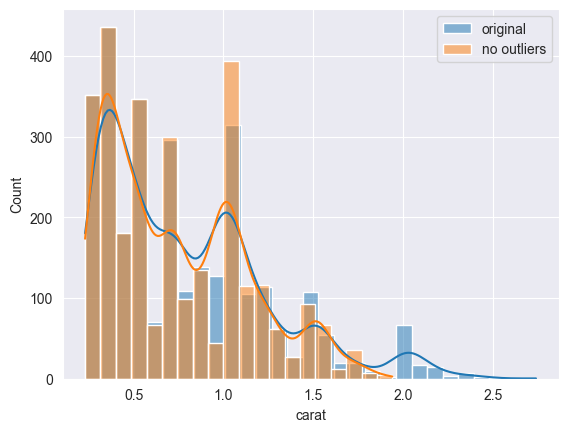

In [56]:
sns.histplot(data=carat, alpha=0.5, kde=True, label='original')

sns.histplot(data=carat_out, alpha=0.5, kde=True, label='no outliers')
plt.legend()

> The above histogram shows the distribution of carat, with and without outliers (blue with, orange without). We can see that a diamond having carats above 2 seem to be considered uncommon, but like with price, the outliers do not appear to be obscure, so they will remain in the dataset. 

In [71]:
# sns.stripplot(x=carat, alpha=0.5, color='blue')
# sns.stripplot(x=carat_out, alpha=0.3, color='red')

## Exploratory Data Analysis

### Questions
- How do carat and price relate to each other by cut?
- How do x, y, and z relate to each other and the price?
- How does the price differ by clarity?
- What is the average price for each cut/color combonation?
- How do the depth and table relate to the price?

### How do carat and price relate to each other by cut?

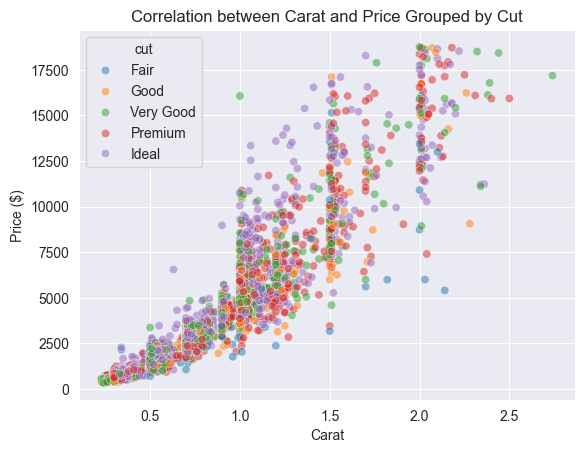

In [61]:
sns.scatterplot(data=sample, x='carat', y='price', hue='cut', alpha=0.5)
plt.title("Correlation between Carat and Price Grouped by Cut")
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.savefig('./images/carat_price_cut.png');

> This scatterplot shows the relationship between carat and price, and the colors group it by the type of cut. We can see that carat and price are strongly related, but the distribution of different cuts do not seem to be as affected by price, as the groups spread out all over the scatterplot. 

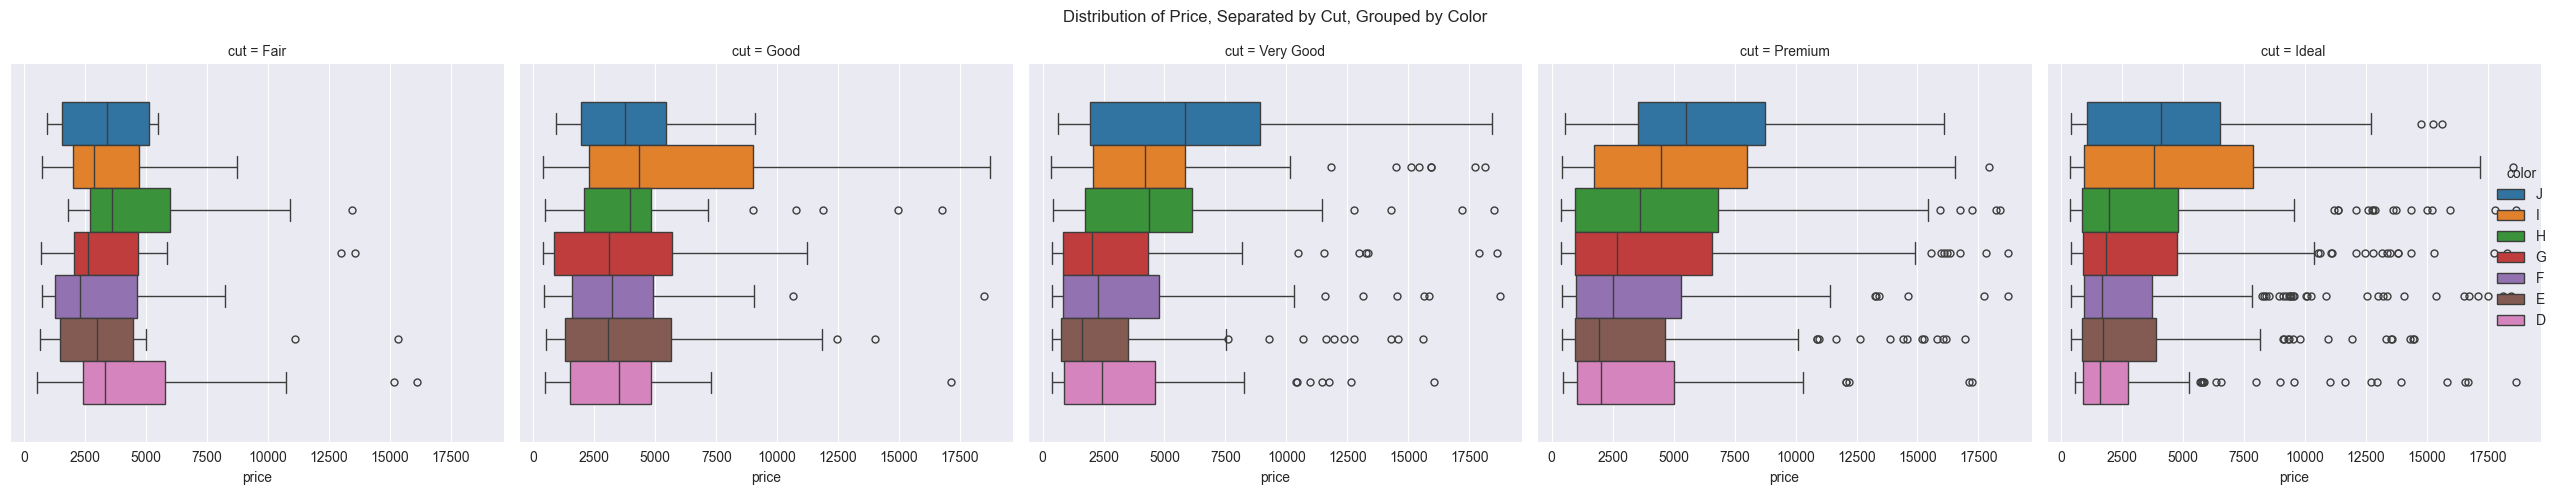

In [63]:
sns.catplot(data=sample, x='price', hue='color', kind='box', col='cut')
plt.suptitle("Distribution of Price, Separated by Cut, Grouped by Color")
plt.tight_layout()

> The above plots show the distribution of prices, separated by the type of cut, grouped together by color.
>
> For example:
> 
> We see that among Fair cuts, J color diamonds have a small distribution, while among Very Good cuts, it spans across all the prices. 

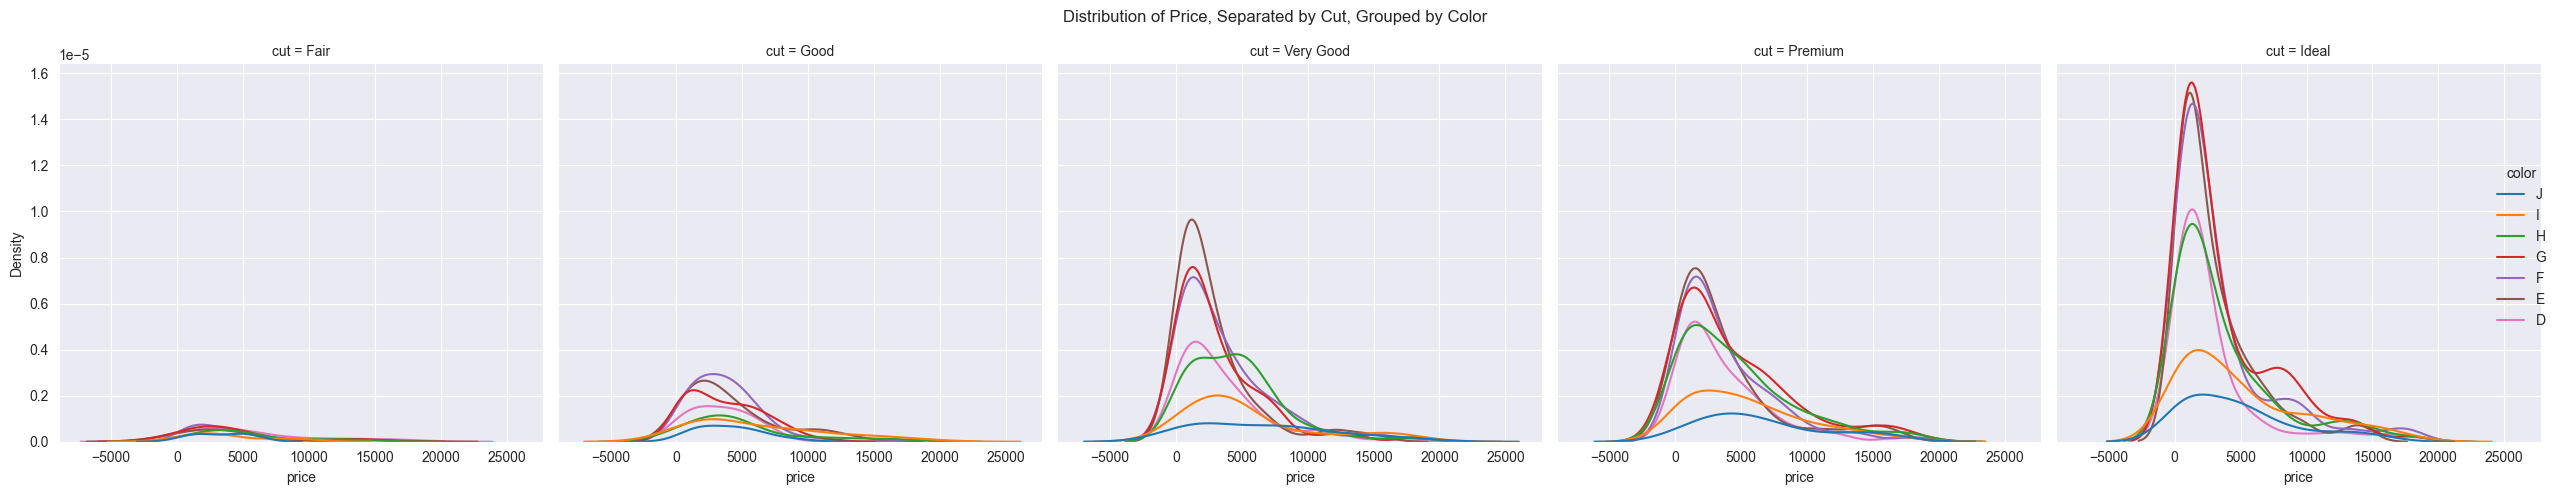

In [64]:
sns.displot(data=sample, x='price', hue='color', kind='kde', col='cut', fill=False)
plt.suptitle("Distribution of Price, Separated by Cut, Grouped by Color")
plt.tight_layout()

> These plots show the same information, but as KDE plots, rather than box plots. We see that in the lower cuts, there are not many diamonds in these categories, as noted by the small peaks, while for Ideal cuts, this category has the most diamonds. 

### How do x, y, and z relate to each other?

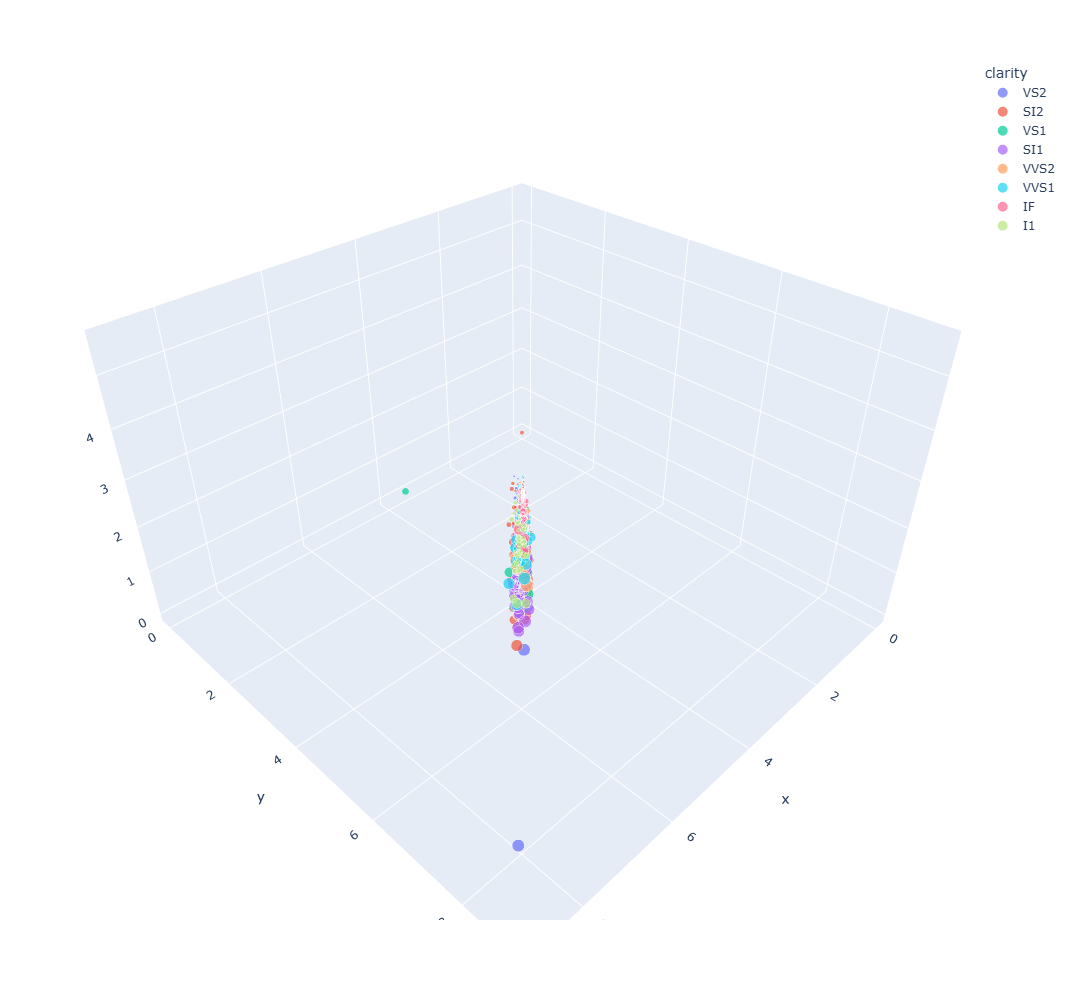

<Figure size 1600x1600 with 0 Axes>

In [40]:
plt.figure(figsize=(16, 16))
fig = px.scatter_3d(
    sample,
    x='x',
    y='y',
    z='z',
    color='clarity',
    size='price'
)
fig.update_layout(
    width=1000,
    height=1000
)

fig.show()


### How does the price distribution differ by clarity?

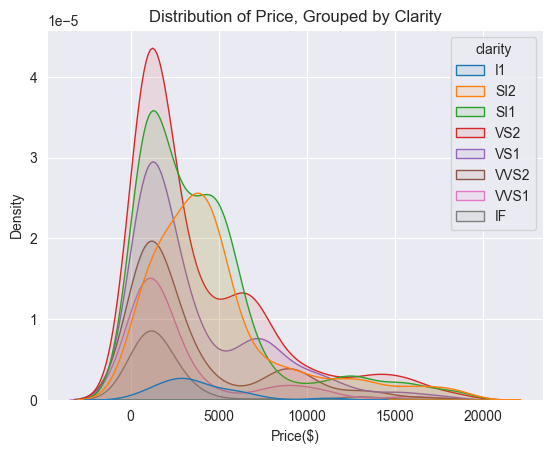

In [65]:
sns.kdeplot(data=sample, x='price', hue='clarity', fill=True, alpha=0.1)
plt.title("Distribution of Price, Grouped by Clarity")
plt.xlabel("Price($)")
plt.savefig("./images/price_kde.png")

> The above kdeplot shows the distribuiton of the price by the clarity of the diamond.
>
> At first glance, it appears that most of the diamonds are of the clarity VS2, but upon closer inspection, we see a smaller, wide peak for SI1, showing that this clarity is the most common. VS2 is only more common among the lower prices (0-~4000). We also see that the clarity I1 has the lowest probability, having a very small peak and a broad width. 

### What is the average price for each cut/color combonation?

In [42]:
price_cut_color = pd.pivot_table(data=df, index='cut', columns='color', values='price', observed=True)
price_cut_color

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,4975.655462,4607.534483,5091.307692,4227.000000,3834.750809,3689.743243,4291.061350
Good,4587.833333,5032.471042,4246.585122,4114.074799,3497.254405,3425.748657,3408.107576
Very Good,5110.304284,5257.477140,4524.835074,3874.210183,3777.724457,3215.471030,3472.662252
Premium,6287.733251,5934.466245,5217.907274,4498.782728,4327.297286,3542.385242,3634.493433
Ideal,4922.871365,4452.125359,3896.114369,3728.445838,3378.721131,2601.217056,2635.239107


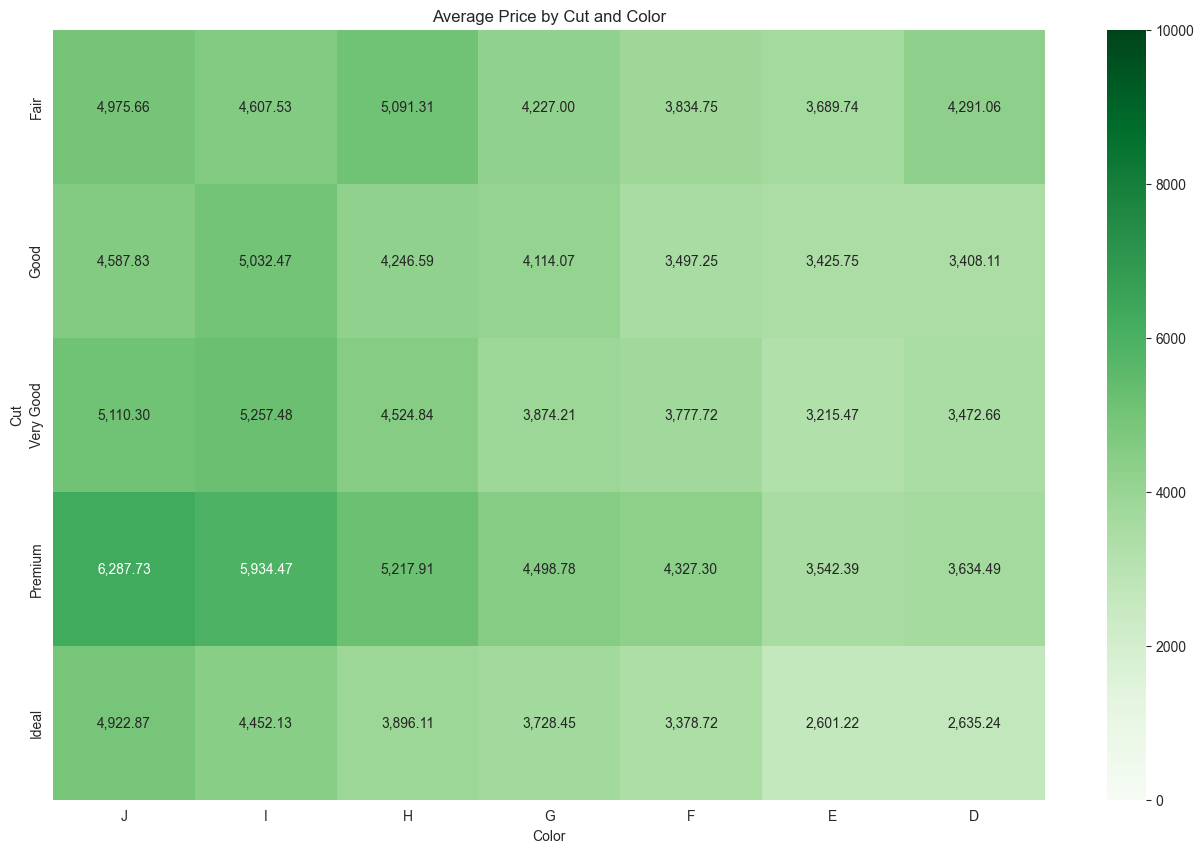

In [67]:
plt.figure(figsize=(16, 10))
sns.heatmap(price_cut_color, annot=True, fmt=',.2f', cmap='Greens',
           vmin=0,
            vmax=10000
           )
plt.title("Average Price by Cut and Color")
plt.xlabel("Color")
plt.ylabel("Cut")
plt.savefig("./images/price_cut_color.png")

### How do the depth and table relate to the price?

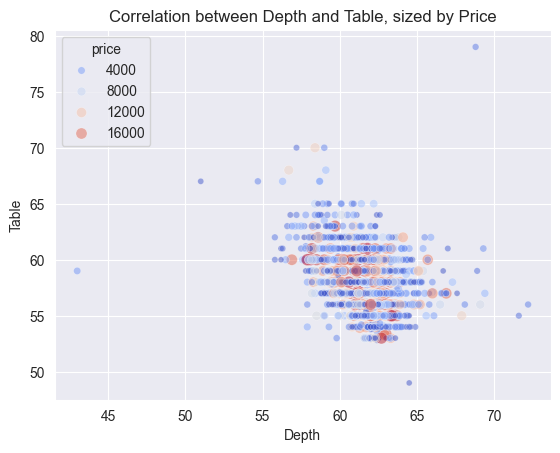

In [69]:
sns.scatterplot(data=sample, x='depth', y='table', size='price', alpha=0.5, palette='coolwarm', hue='price')
plt.title("Correlation between Depth and Table, sized by Price")
plt.xlabel("Depth")
plt.ylabel("Table")
plt.savefig("./images/depth_table.png")

<Axes: >

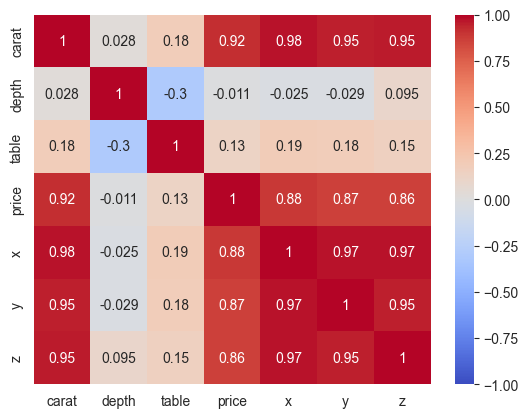

In [45]:
sns.heatmap(data=df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='coolwarm')

In [46]:
df.shape

(53794, 10)

In [47]:
# df.to_csv('./data/cleaned_diamonds.csv', index=False)